## Random Forest

In [ ]:
rf_data = model_data.copy()


In [ ]:
# rf_data.reset_index(inplace = True)

# rf_data.set_index(['date', 'TICKER'], inplace=True)


In [ ]:
# 分割数据集为训练集和最后一个月的预测集
last_month = rf_data.index.max()
rf_data_for_training = rf_data[rf_data.index < last_month]
rf_data_using_model_predicting = rf_data[rf_data.index == last_month]


In [ ]:
features = rf_data.columns[~rf_data.columns.isin(['TICKER','RET'])].tolist()


In [ ]:
#Define the idependent variables (X) and the dependent variable (y)
features = rf_data.columns[~rf_data.columns.isin(['TICKER','RET'])].tolist()
X = rf_data_for_training[features]
y = rf_data_for_training['RET']

# 'BAA10Y','TB3MS','T10Y2Y'
# 逆变换整个数据集
# y_and_many_inversed = min_max_scaler.inverse_transform(rf_data[min_max_features])

# 如果你只需要 RET 列的原始值，你应该先确定它在 features 中的位置
# ret_index = min_max_features.index('RET')  # 获取RET在features列表中的位置
# y = y_and_many_inversed[:, ret_index]  # 获取逆变换后的RET列


In [ ]:
X.columns

Index(['Size', 'Momentum', 'r2_1', 'r12_2', 'r12_7', 'ShortTermReversal',
       'DollarVolume', 'spread', 'idio_vol', 'Beta', 'BetaSquared',
       'Volatility', 'SUV', '52_week_high', 'Rel_to_high', 'TB3MS', 'T10Y2Y',
       'BAA10Y', 'vwretd', 'ewretd', 'sprtrn', 'LME', 'LTurnover', 'bm',
       'market_cap', 'pe_op_basic', 'pe_op_dil', 'roa', 'roe', 'roce',
       'debt_assets', 'debt_capital', 'de_ratio', 'cash_ratio', 'quick_ratio',
       'curr_ratio', 'at_turn', 'inv_turn', 'accrual'],
      dtype='object')

In [ ]:
# 看特征
# 创建随机森林模型
# model = RandomForestRegressor(n_estimators=100, random_state=42)
model = RandomForestRegressor(
    n_estimators=100, 
    min_samples_split=2, 
    min_samples_leaf=4, 
    max_features='auto', 
    max_depth=21, 
    bootstrap=True, 
    random_state=42
)

model.fit(X, y)

# 获取特征重要性并排序
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# 显示特征重要性
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({feature_importances[indices[f]]}) - {features[indices[f]]}")

# 可以基于特征重要性进行特征选择，例如选择重要性最高的N个特征
selected_features = indices[:10]  # 选择重要性排名前3的特征


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Feature ranking:
1. feature 18 (0.21023558658642835) - vwretd
2. feature 12 (0.1247029764007799) - SUV
3. feature 20 (0.0920166122088924) - sprtrn
4. feature 11 (0.08755874060514944) - Volatility
5. feature 14 (0.047891095416418665) - Rel_to_high
6. feature 2 (0.03771144090778528) - r2_1
7. feature 19 (0.03671874616351577) - ewretd
8. feature 3 (0.02697297802531812) - r12_2
9. feature 7 (0.02446477023170187) - spread
10. feature 6 (0.017041699738832843) - DollarVolume
11. feature 5 (0.016576451535295703) - ShortTermReversal
12. feature 4 (0.015548935380562514) - r12_7
13. feature 9 (0.015419148442830887) - Beta
14. feature 38 (0.014884256259075438) - accrual
15. feature 1 (0.014029583039048908) - Momentum
16. feature 8 (0.013049055259643522) - idio_vol
17. feature 35 (0.012879295727767474) - curr_ratio
18. feature 25 (0.012665778356085133) - pe_op_basic
19. feature 13 (0.012075510643455778) - 52_week_high
20. feature 28 (0.011792105562982286) - roe
21. feature 22 (0.01125066782912691) 

In [ ]:
print("Selected features:", [features[i] for i in selected_features])


Selected features: ['vwretd', 'SUV', 'sprtrn', 'Volatility', 'Rel_to_high', 'r2_1', 'ewretd', 'r12_2', 'spread', 'DollarVolume']


sprtrn - S&P Total Return:

这个指标通常代表标准普尔500指数的总回报率。总回报率包括股息再投资的影响，这是评估股市表现的一个重要指标。

vwretd - Volume Weighted Return Difference:

这是一个基于成交量加权的回报率差异指标，用于评估在特定时间内基于交易量加权的平均回报。

ewretd - Equal Weighted Return Difference:

这表示等权重配置的投资组合的回报率差异，每个组成部分的权重相等，用于评估所有股票同等重要的场景下的表现。

BAA10Y - BAA Corporate Bonds relative to 10 Years Treasury:

这个指标显示的是10年期美国国债与BAA评级（较低的投资级别债券）公司债券的收益率差。这通常用来评估信用风险和市场对不同信用级别债券的需求。

TB3MS - 3-Month Treasury Bill Rate:

这是美国三个月期国库券的收益率，经常被用作无风险利率的代表，对于评估其他投资相对于无风险资产的吸引力很有用。

T10Y2Y - 10-Year Treasury Minus 2-Year Treasury:

这是10年期美国国债与2年期美国国债收益率的差值，常用于衡量市场对经济前景的预期（收益率曲线的斜率）。

ShortTermReversal - 短期反转:

这是一个市场动量指标，描述了资产价格短期内的反转趋势，常用于捕捉和利用市场过度反应的情况。

spread - Bid-Ask Spread:

这是买卖价差，即最低售价和最高买价之间的差额，是衡量市场流动性的一个直接指标。

Momentum - 动量:

在金融市场中，动量指的是资产价格继续其当前趋势（上涨或下跌）的能力。动量策略基于假设走势强劲的资产将继续表现良好。

LTurnover - Liquidity Turnover:

流动性周转率通常指交易量与市场规模的比率，用于评估市场的活跃程度和资产的流动性。

In [ ]:
# 设置划分点
split_date = pd.Timestamp('2022-12-31')

# 划分数据集
X_train = X.loc[X.index <= split_date]
y_train = y.loc[y.index <= split_date]
X_test = X.loc[X.index > split_date]
y_test = y.loc[y.index > split_date]

In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(2810, 39) (2810, 1) (319, 39) (319, 1)


In [ ]:
# 训练模型

# 模型参数
rf_params = {
    'n_estimators': 100,
    # 'max_depth': 21,
    # 'min_samples_split': 2,
    # 'min_samples_leaf': 4,
    # 'max_features': 'auto',
    'random_state': 42
}

# 2. 模型创建和训练
rf_model = RandomForestRegressor(**rf_params)
rf_model.fit(X_train, y_train)

# 3. 模型评估
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mape}")

print(f"R-squared Score: {r2}")



Mean Squared Error: 0.0002293448924930834
Mean Absolute Error: 1.7871381686457726
R-squared Score: 0.14469257858159534


In [ ]:
X_predict = pd.DataFrame(rf_data_using_model_predicting[features])
y_actual = rf_data_using_model_predicting['RET']

# 在最后一个月的预测集上进行预测
y_predict = rf_model.predict(X_predict)

r2_predict = r2_score(y_actual, y_predict)
mse_predict = mean_squared_error(y_actual, y_predict)
mape_predict = mean_absolute_percentage_error(y_actual, y_predict)

print(f'Prediction R²: {r2_predict:.4f}')
print(f'Prediction MSE: {mse_predict:.4f}')
print(f'Prediction MAPE: {mape_predict:.4f}')

Prediction R²: -0.3621
Prediction MSE: 0.0001
Prediction MAPE: 2.3989


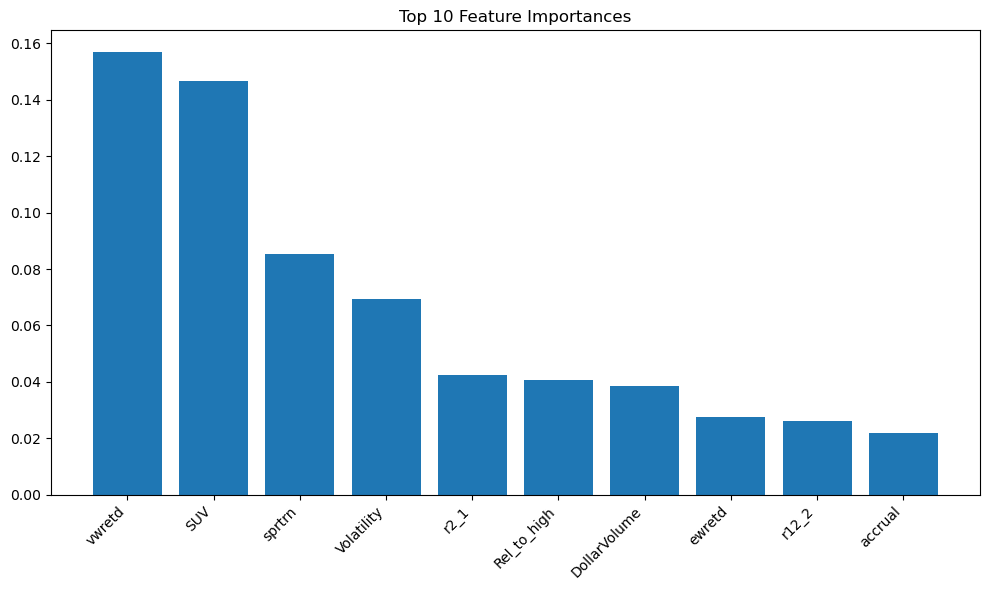

In [ ]:
# 4. 特征重要性
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SelectFromModel

In [ ]:
# 特征选择
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))
X_selected = selector.fit_transform(X, y)

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# 时间序列交叉验证
tscv = TimeSeriesSplit(n_splits=5)

# 模型参数
rf_params = {
    'n_estimators': 1000,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': 42
}

# 训练模型
rf_model = RandomForestRegressor(**rf_params)

# 使用时间序列交叉验证
r2_scores = []
mse_scores = []
mape_scores = []
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    r2_scores.append(rf_model.score(X_test, y_test))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mape_scores.append(mean_absolute_percentage_error(y_test, y_pred))

print(f"Average R2 score: {np.mean(r2_scores)}")


/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_82990/2256202845.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_82990/2256202845.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_82990/2256202845.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

Average R2 score: 0.15613823919346492


In [ ]:
print(f"Average Mean Squared Error: {np.mean(mse)}")
print(f"Average Mean Absolute Error: {np.mean(mape)}")

Average Mean Squared Error: 0.0002293448924930834
Average Mean Absolute Error: 1.7871381686457726


In [ ]:
# y_test.head()

In [ ]:
# X_test.index

# Optimization

我在用crsp的数据来做机器学习优化投资组合，具体来说，是用财报数据结合宏观基本面和时序特征预测股票回报率并用均值方差的投资组合策略最大化投资收益。我现在有了model，为了测评它最后的收益表现到底如何，我想的是：假设一个人用了我们的模型，那么ta应该能看到历史的所有数据，那么，正确的应该是由第0年的前11个月个数据（feature），预测第12个月的数据（回报率），然后用前12个月数据预测第13个月数据，然后用前13个月预测第14个月数据……以此类推，然后基于每个月每个股票的回报率及预测的方差，都能用解线性优化的方式得到一个所有股票的最优投资权重组合，然后有了这么多个预测的月的回报率，结合当月实际的无风险利率，可以算一个Sharpe ratio，有了所有的Sharpe ratio后可以算一个平均值。你看我的研究思路有问题吗



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import minimize

In [ ]:
variables_to_keep

Index(['Size', 'bm', 'Momentum', 'r2_1', 'r12_2', 'r12_7', 'ShortTermReversal',
       'market_cap', 'DollarVolume', 'spread', 'RET', 'idio_vol', 'Beta',
       'BetaSquared', 'pe_op_basic', 'pe_op_dil', 'Volatility', 'SUV',
       '52_week_high', 'Rel_to_high', 'TB3MS', 'T10Y2Y', 'BAA10Y', 'roa',
       'roe', 'roce', 'debt_assets', 'debt_capital', 'de_ratio', 'cash_ratio',
       'quick_ratio', 'curr_ratio', 'at_turn', 'inv_turn', 'accrual', 'vwretd',
       'ewretd', 'sprtrn', 'LME', 'LTurnover', 'TICKER'],
      dtype='object')

In [ ]:
opt_data = model_data.copy()
# opt_data = opt_data[variables_to_keep]


In [ ]:
#股票数据中的RET（回报率）可能也是以百分比形式表示的，需要除以100来转换为小数形式。
#您报告的投资组合回报率是 3.0784%，这个数值看起来确实像是一个百分比形式的月度回报率。

# opt_data['RET'] = opt_data['RET'] / 100

previous try:
    Index([
     
     'Size', 'bm', 'Momentum', 'ShortTermReversal', 'ME', 'market_cap',
       'DollarVolume', 'spread', 'RET', 'Idio_vol', 'Beta', 'BetaSquared',
       'divyield', 'pe_op_basic', 'pe_op_dil', 'TB3MS', 'T10Y2Y', 'BAA10Y',
       'roa', 'roe', 'roce', 'debt_assets', 'debt_capital', 'de_ratio',
       'cash_ratio', 'quick_ratio', 'curr_ratio', 'at_turn', 'inv_turn',
       'accrual', 'vwretd', 'ewretd', 'sprtrn', 'LME', 'LTurnover', 'TICKER'],
      dtype='object')

In [ ]:
opt_data.columns

Index(['RET', 'TICKER', 'Size', 'bm', 'Momentum', 'r2_1', 'r12_2', 'r12_7',
       'ShortTermReversal', 'market_cap', 'DollarVolume', 'spread', 'idio_vol',
       'Beta', 'BetaSquared', 'pe_op_basic', 'pe_op_dil', 'Volatility', 'SUV',
       '52_week_high', 'Rel_to_high', 'TB3MS', 'T10Y2Y', 'BAA10Y', 'roa',
       'roe', 'roce', 'debt_assets', 'debt_capital', 'de_ratio', 'cash_ratio',
       'quick_ratio', 'curr_ratio', 'at_turn', 'inv_turn', 'accrual', 'vwretd',
       'ewretd', 'sprtrn', 'LME', 'LTurnover'],
      dtype='object')

In [ ]:
# 如果日期已经是索引，先重置索引
opt_data.reset_index(inplace=True)

# 设置多级索引
opt_data.set_index(['date', 'TICKER'], inplace=True)


# 对MultiIndex进行排序
opt_data.sort_index(inplace=True)

In [ ]:
opt_data.shape

(3158, 40)

In [ ]:
opt_data.index

MultiIndex([('2014-07-31', 'AAPL'),
            ('2014-07-31', 'AMZN'),
            ('2014-07-31',  'AXP'),
            ('2014-07-31',  'BAC'),
            ('2014-07-31',  'BYI'),
            ('2014-07-31',    'C'),
            ('2014-07-31',   'CB'),
            ('2014-07-31',  'CBS'),
            ('2014-07-31', 'CHTR'),
            ('2014-07-31',  'COF'),
            ...
            ('2023-12-31',   'MA'),
            ('2023-12-31',  'MCO'),
            ('2023-12-31',  'NVR'),
            ('2023-12-31',  'OXY'),
            ('2023-12-31', 'PARA'),
            ('2023-12-31', 'SIRI'),
            ('2023-12-31', 'SNOW'),
            ('2023-12-31', 'TMUS'),
            ('2023-12-31',    'V'),
            ('2023-12-31', 'VRSN')],
           names=['date', 'TICKER'], length=3158)

### 为了拿到无风险利率，读一遍归一化前的数据，存到featured_data里

In [ ]:
featured_data = pd.read_csv('final_data_after_missing_value_handle_with_better_features.csv')

In [ ]:
featured_data.set_index(['date', 'TICKER'], inplace=True)

In [ ]:
# 对MultiIndex进行排序
featured_data.sort_index(inplace=True)

In [ ]:
featured_data.shape

(3382, 141)

In [ ]:
featured_data.index

MultiIndex([('2014-01-31', 'AAPL'),
            ('2014-01-31', 'AMZN'),
            ('2014-01-31',  'AXP'),
            ('2014-01-31',  'BAC'),
            ('2014-01-31',  'BYI'),
            ('2014-01-31',    'C'),
            ('2014-01-31',   'CB'),
            ('2014-01-31',  'CBS'),
            ('2014-01-31', 'CHTR'),
            ('2014-01-31',  'COF'),
            ...
            ('2023-12-31',   'MA'),
            ('2023-12-31',  'MCO'),
            ('2023-12-31',  'NVR'),
            ('2023-12-31',  'OXY'),
            ('2023-12-31', 'PARA'),
            ('2023-12-31', 'SIRI'),
            ('2023-12-31', 'SNOW'),
            ('2023-12-31', 'TMUS'),
            ('2023-12-31',    'V'),
            ('2023-12-31', 'VRSN')],
           names=['date', 'TICKER'], length=3382)

In [ ]:

# 确保索引格式一致
opt_data.index = opt_data.index.set_levels([pd.to_datetime(opt_data.index.levels[0]), opt_data.index.levels[1]])
featured_data.index = featured_data.index.set_levels([pd.to_datetime(featured_data.index.levels[0]), featured_data.index.levels[1]])

# 确保索引对齐
common_index = opt_data.index.intersection(featured_data.index)

# 只替换common_index中的值
opt_data.loc[common_index, 'RET'] = featured_data.loc[common_index, 'RET']

In [ ]:
opt_data.index

MultiIndex([('2014-07-31', 'AAPL'),
            ('2014-07-31', 'AMZN'),
            ('2014-07-31',  'AXP'),
            ('2014-07-31',  'BAC'),
            ('2014-07-31',  'BYI'),
            ('2014-07-31',    'C'),
            ('2014-07-31',   'CB'),
            ('2014-07-31',  'CBS'),
            ('2014-07-31', 'CHTR'),
            ('2014-07-31',  'COF'),
            ...
            ('2023-12-31',   'MA'),
            ('2023-12-31',  'MCO'),
            ('2023-12-31',  'NVR'),
            ('2023-12-31',  'OXY'),
            ('2023-12-31', 'PARA'),
            ('2023-12-31', 'SIRI'),
            ('2023-12-31', 'SNOW'),
            ('2023-12-31', 'TMUS'),
            ('2023-12-31',    'V'),
            ('2023-12-31', 'VRSN')],
           names=['date', 'TICKER'], length=3158)

In [ ]:
opt_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3158 entries, (Timestamp('2014-07-31 00:00:00'), 'AAPL') to (Timestamp('2023-12-31 00:00:00'), 'VRSN')
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RET                3158 non-null   float64
 1   Size               3158 non-null   float64
 2   bm                 3158 non-null   float64
 3   Momentum           3158 non-null   float64
 4   r2_1               3158 non-null   float64
 5   r12_2              3158 non-null   float64
 6   r12_7              3158 non-null   float64
 7   ShortTermReversal  3158 non-null   float64
 8   market_cap         3158 non-null   float64
 9   DollarVolume       3158 non-null   float64
 10  spread             3158 non-null   float64
 11  idio_vol           3158 non-null   float64
 12  Beta               3158 non-null   float64
 13  BetaSquared        3158 non-null   float64
 14  pe_op_basic        3158 non-null   float6

In [ ]:
opt_data.to_csv('opt_data.csv')

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)


In [ ]:
opt_features = opt_data.columns[~opt_data.columns.isin(['RET','TICKER'])].tolist()
target = ['RET']

In [ ]:
opt_data[target].head()

RET
date       TICKER          
2014-07-31 AAPL   -0.025981
           AMZN   -0.029519
           AXP    -0.032010
           BAC    -0.021181
           BYI    -0.010362

In [ ]:
# opt_features

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import logging
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def get_data_for_date_range(df, start_date, end_date):
    # return df.loc[start_date:end_date]
    if start_date is None:
        data = df.loc[:end_date]
    else:
        data = df.loc[start_date:end_date]
    if data.empty:
        logger.warning(f"No data found between {start_date} and {end_date}")
    return data

def prepare_training_data(df, features, target):
    X = df[features]
    y = df[target]
    # return X, y
    if X.empty or y.empty:
        logger.warning("Training data is empty.")
    return X, y

def fit_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    return model.predict(X_test)

def calculate_portfolio_metrics(weights, returns, cov_matrix):
    portfolio_return = np.sum(returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# 目标函数：最大化夏普比率
def objective(weights, returns, cov_matrix, lambda_risk_aversion):
    portfolio_return, portfolio_volatility = calculate_portfolio_metrics(weights, returns, cov_matrix)
    return -portfolio_return / portfolio_volatility  # 最大化夏普比率

# 分配相等的权重
def equal_weight_portfolio(expected_returns):
    n = len(expected_returns)
    equal_weights = np.ones(n) / n
    return equal_weights

# 优化投资组合权重
def optimize_portfolio(expected_returns, cov_matrix, lambda_risk_aversion):
    # n = len(expected_returns)
    # constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 权重之和为1的约束
    # bounds = tuple((0, 1) for _ in range(n))  # 权重在0到1之间

    # # 最小化目标函数
    # result = minimize(objective, n * [1./n], args=(expected_returns, cov_matrix, lambda_risk_aversion),
    #                   method='SLSQP', bounds=bounds, constraints=constraints)
    
    # print(result.x)
    
    # if not result.success:
    #     logger.warning(f"Optimization failed: {result.message}")
    
    # return result.x
    n = len(expected_returns)
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # 权重之和为1
        {'type': 'ineq', 'fun': lambda x: x}  # 所有权重非负
    )
    bounds = tuple((0, 1) for _ in range(n))  # 权重在0到1之间

    result = minimize(objective, n * [1./n], args=(expected_returns, cov_matrix, lambda_risk_aversion),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    
    if not result.success:
        logger.warning(f"Optimization failed: {result.message}")
    
    # 确保权重非负且和为1
    weights = np.maximum(result.x, 0)
    weights /= np.sum(weights)
    
    return weights


def predict_returns(df, start_date, next_month, features, target, rf_model):
    try:
        logger.info(f"Predicting returns from {start_date} to {next_month}")
        
        # Filter data for the training period (up to and including start_date)
        train = df[df.index.get_level_values('date') <= start_date]
        
        # Filter data for the test period (next_month only)
        test = df[df.index.get_level_values('date') == next_month]
        
        logger.info(f"Train data shape: {train.shape}")
        logger.info(f"Test data shape: {test.shape}")
        
        X_train, y_train = prepare_training_data(train, features, target)
        X_test = test[features]
        
        logger.info(f"X_train shape: {X_train.shape}")
        logger.info(f"y_train shape: {y_train.shape}")
        logger.info(f"X_test shape: {X_test.shape}")
        
        if X_train.shape[0] == 0 or y_train.shape[0] == 0:
            raise ValueError("Training data is empty")
        
        if X_test.shape[0] == 0:
            raise ValueError(f"No data available for the next month: {next_month}")
        
        predictions = fit_and_predict(rf_model, X_train, y_train, X_test)
        logger.info(f"Predictions shape: {predictions.shape}")
        
        if hasattr(rf_model, 'estimators_'):
            predictions_from_all_trees = np.array([tree.predict(X_test) for tree in rf_model.estimators_])
            predicted_variance = np.var(predictions_from_all_trees, axis=0)
        else:
            window = 20  # Adjust window size as needed
            historical_variance = pd.Series(y_train).rolling(window=window).var().iloc[-1]
            predicted_variance = np.full_like(predictions, historical_variance)
            
        logger.info(f"Predicted variance shape: {predicted_variance.shape}")
        
        # Get actual returns for the test period (next_month)
        actual_returns = test[target]
        mse, rmse, mae = calculate_model_metrics(actual_returns, predictions)
        logger.info(f"Model Evaluation Metrics - MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

        return predictions, predicted_variance, actual_returns
        
    except Exception as e:
        logger.error(f"Error in predict_returns: {str(e)}")
        raise


def calculate_model_metrics(y_true, y_pred):
    """
    计算模型评估指标
    
    参数:
    y_true: 实际值
    y_pred: 预测值
    
    返回:
    mse: 均方误差
    rmse: 均方根误差
    mae: 平均绝对误差
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae

# # 方法1：使用所有预测的总体方差
# def global_variance_method(predictions):
#     global_variance = np.var(predictions)
#     return np.full_like(predictions, global_variance)

# # 方法2：使用随机森林的树集合
# def tree_ensemble_variance_method(rf_model, X_test):
#     predictions_from_all_trees = np.array([tree.predict(X_test) for tree in rf_model.estimators_])
#     return np.var(predictions_from_all_trees, axis=0)



In [ ]:
def display_portfolio_composition(weights, df, date, threshold=0.01):
    """
    Display the composition of the portfolio with ticker names and weights.
    
    Parameters:
    weights (numpy.array): Optimized weights for the portfolio
    df (pandas.DataFrame): The original dataframe containing the stock data
    date (pandas.Timestamp): The date for which to display the portfolio
    threshold (float): Minimum weight to include in the display (default: 1%)
    
    Returns:
    pandas.DataFrame: A dataframe showing the portfolio composition
    """
    # Get the tickers for the given date
    tickers = df.loc[date].index.get_level_values('TICKER')
    
    # Create a dataframe with tickers and weights
    portfolio = pd.DataFrame({
        'Ticker': tickers,
        'Weight': weights
    })
    
    # Sort by weight in descending order
    portfolio = portfolio.sort_values('Weight', ascending=False)
    
    # Filter out weights below the threshold
    portfolio = portfolio[portfolio['Weight'] >= threshold]
    
    # Calculate the sum of displayed weights
    displayed_weight_sum = portfolio['Weight'].sum()
    
    # Add a row for "Others" if necessary
    if displayed_weight_sum < 1:
        others_weight = 1 - displayed_weight_sum
        others_row = pd.DataFrame({
            'Ticker': ['Others'],
            'Weight': [others_weight]
        })
        portfolio = pd.concat([portfolio, others_row])
    
    # Format weights as percentages
    portfolio['Weight'] = portfolio['Weight'].apply(lambda x: f"{x:.2%}")
    
    # Reset index for clean display
    portfolio = portfolio.reset_index(drop=True)
    
    return portfolio


# If you want to save this to a CSV file:
# portfolio_composition.to_csv(f"portfolio_composition_{portfolio_date.date()}.csv", index=False)

In [ ]:
def process_single_period(df, featured_data, start_date, next_month, opt_features, target, rf_model, lambda_risk_aversion):
    try:
        logger.info(f"Processing period from {start_date} to {next_month}")
        
        historical_data = df[df.index.get_level_values('date') <= start_date]
        logger.info(f"Historical data shape: {historical_data.shape}")
        
        predicted_returns, predicted_variance, actual_returns = predict_returns(df, start_date, next_month, opt_features, target, rf_model)
        
        cov_matrix = np.diag(predicted_variance)
        logger.info(f"Covariance matrix shape: {cov_matrix.shape}")
        
        optimal_weights = optimize_portfolio(predicted_returns, cov_matrix, lambda_risk_aversion)
        logger.info(f"Optimal weights shape: {optimal_weights.shape}")
        
        portfolio_composition = display_portfolio_composition(optimal_weights, df, next_month)
        print(f"Portfolio Composition for {next_month.date()}:")
        print(portfolio_composition)
        
        mse, rmse, mae = calculate_model_metrics(actual_returns, predicted_returns)
        r2 = r2_score(actual_returns, predicted_returns)
        
        # Use the next_month to get the risk-free rate
        rf_data = featured_data.loc[featured_data.index.get_level_values('date') == next_month, 'TB3MS']
        if len(rf_data) > 0:
            annual_rf_rate = rf_data.iloc[0] / 100
            logger.info(f"Annual Risk-free rate: {annual_rf_rate}")
            monthly_rf_rate = (1 + annual_rf_rate) ** (1/12) - 1
            logger.info(f"Monthly Risk-free rate: {monthly_rf_rate}")
        else:
            logger.warning(f"No risk-free rate data for {next_month}. Using 0 as default.")
            monthly_rf_rate = 0
        
        # Calculate monthly portfolio returns
        monthly_portfolio_returns = np.sum(optimal_weights * actual_returns.values)
        
        # Calculate monthly return
        portfolio_return = monthly_portfolio_returns
        logger.info(f"Monthly Portfolio return: {portfolio_return}")
        
        # Calculate monthly portfolio volatility
        monthly_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
        logger.info(f"Monthly Portfolio volatility: {monthly_volatility}")
        
        # Calculate monthly Sharpe ratio
        monthly_sharpe_ratio = (portfolio_return - monthly_rf_rate) / monthly_volatility
        logger.info(f"Monthly Sharpe ratio: {monthly_sharpe_ratio}")
        
        # Annualize Sharpe ratio
        annualized_sharpe_ratio = monthly_sharpe_ratio * np.sqrt(12)
        logger.info(f"Annualized Sharpe ratio: {annualized_sharpe_ratio}")
        
        return portfolio_return, monthly_sharpe_ratio, mse, rmse, mae, r2
    except Exception as e:
        logger.error(f"Error processing period {start_date} to {next_month}: {str(e)}")
        raise
        
# 使用示例：
date = pd.Timestamp('2017-08-31')
next_month = date + pd.DateOffset(months=1)
lambda_risk_aversion = 0.5
portfolio_return, sharpe_ratio, mse, rmse, mae, r2 = process_single_period(opt_data, featured_data, date, next_month, opt_features, target, rf_model, lambda_risk_aversion)
if portfolio_return is not None and sharpe_ratio is not None:
    print(f"Portfolio Return: {portfolio_return:.4f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")


INFO:__main__:Processing period from 2017-08-31 00:00:00 to 2017-09-30 00:00:00
INFO:__main__:Historical data shape: (1016, 40)
INFO:__main__:Predicting returns from 2017-08-31 00:00:00 to 2017-09-30 00:00:00
INFO:__main__:Train data shape: (1016, 40)
INFO:__main__:Test data shape: (27, 40)
INFO:__main__:X_train shape: (1016, 39)
INFO:__main__:y_train shape: (1016, 1)
INFO:__main__:X_test shape: (27, 39)
INFO:__main__:Predictions shape: (27,)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/

Portfolio Composition for 2017-09-30:
    Ticker  Weight
0      AXP  11.18%
1      MCO   9.43%
2     SIRI   9.26%
3     VRSN   8.74%
4    LSXMA   8.72%
5      NVR   5.97%
6     TMUS   5.36%
7        C   5.20%
8     ALLY   4.09%
9       KO   3.71%
10    AMZN   3.59%
11     DVA   3.14%
12      ES   3.13%
13     CVX   2.89%
14     LPX   2.74%
15     LUK   2.40%
16     BAC   2.21%
17     ITG   1.67%
18     COF   1.62%
19      KR   1.43%
20    CHTR   1.41%
21     CBS   1.20%
22  Others   0.89%
Portfolio Return: 0.0266
Sharpe Ratio: 13.1381
MSE: 0.0002
RMSE: 0.0137
MAE: 0.0088
R²: -0.0795


In [ ]:
def rolling_portfolio_optimization(opt_data, featured_data, start_date, end_date, features, target, model, lambda_risk_aversion, window_size):
    dates = pd.date_range(start_date, end_date, freq='M')
    portfolio_returns = []
    sharpe_ratios = []
    mses = []
    rmses = []
    maes = []
    r2s = []

    for i in range(len(dates) - window_size):
        train_start = dates[i]
        train_end = dates[i + window_size - 1]
        next_month = dates[i + window_size]
        
        logger.info(f"Training from {train_start} to {train_end}, predicting for {next_month}")
        
        # 训练模型
        train_data = get_data_for_date_range(opt_data, train_start, train_end)
        X_train, y_train = prepare_training_data(train_data, features, target)
        model.fit(X_train, y_train)
        
        # 处理单个时期并计算投资组合回报率和夏普比率
        portfolio_return, sharpe_ratio, mse, rmse, mae, r2 = process_single_period(opt_data, featured_data, train_end, next_month, opt_features, target, rf_model, lambda_risk_aversion)
        portfolio_returns.append(portfolio_return)
        sharpe_ratios.append(sharpe_ratio)
        mses.append(mse)
        rmses.append(rmse)
        maes.append(mae)
        r2s.append(r2)
        
    
    return portfolio_returns, sharpe_ratios, mses, rmses, maes, r2s



In [ ]:
# 使用示例：
start_date = pd.Timestamp('2014-03-31')
end_date = pd.Timestamp('2015-11-30')
lambda_risk_aversion = 0.5
window_size = 12  # 每个持有期为12个月

# 这里假设 rf_model 是已经定义好的模型，opt_data 和 opt_features 是预先定义好的数据和特征
portfolio_returns, sharpe_ratios, mse, rmse, mae, r2 = rolling_portfolio_optimization(opt_data, featured_data, start_date, end_date, opt_features, target, rf_model, lambda_risk_aversion, window_size)


# 计算平均夏普比率
average_sharpe_ratio = np.mean(sharpe_ratios)
print(f"Average Sharpe Ratio: {average_sharpe_ratio}")

print(f"Average MSE: {np.mean(mses)}")
print(f"Average RMSE: {np.mean(rmses)}")
print(f"Average MAE: {np.mean(maes)}")
print(f"Average R2: {np.mean(r2s)}")


/var/folders/pp/0c_n54bd7wd4nrd15cp7l12m0000gn/T/ipykernel_82990/4115769445.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start_date, end_date, freq='M')
INFO:__main__:Training from 2014-03-31 00:00:00 to 2015-02-28 00:00:00, predicting for 2015-03-31 00:00:00
INFO:__main__:Processing period from 2015-02-28 00:00:00 to 2015-03-31 00:00:00
INFO:__main__:Historical data shape: (210, 40)
INFO:__main__:Predicting returns from 2015-02-28 00:00:00 to 2015-03-31 00:00:00
INFO:__main__:Train data shape: (210, 40)
INFO:__main__:Test data shape: (27, 40)
INFO:__main__:X_train shape: (210, 39)
INFO:__main__:y_train shape: (210, 1)
INFO:__main__:X_test shape: (27, 39)
INFO:__main__:Predictions shape: (27,)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/p

Portfolio Composition for 2015-03-31:
   Ticker  Weight
0      NU  55.50%
1    TMUS  41.58%
2    AMZN   2.93%
3  Others   0.00%


INFO:__main__:Processing period from 2015-03-31 00:00:00 to 2015-04-30 00:00:00
INFO:__main__:Historical data shape: (237, 40)
INFO:__main__:Predicting returns from 2015-03-31 00:00:00 to 2015-04-30 00:00:00
INFO:__main__:Train data shape: (237, 40)
INFO:__main__:Test data shape: (27, 40)
INFO:__main__:X_train shape: (237, 39)
INFO:__main__:y_train shape: (237, 1)
INFO:__main__:X_test shape: (27, 39)
INFO:__main__:Predictions shape: (27,)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/

Portfolio Composition for 2015-04-30:
   Ticker  Weight
0      NU  78.54%
1    AMZN  13.75%
2     MCO   5.15%
3    TMUS   1.61%
4  Others   0.95%


INFO:__main__:Processing period from 2015-04-30 00:00:00 to 2015-05-31 00:00:00
INFO:__main__:Historical data shape: (264, 40)
INFO:__main__:Predicting returns from 2015-04-30 00:00:00 to 2015-05-31 00:00:00
INFO:__main__:Train data shape: (264, 40)
INFO:__main__:Test data shape: (26, 40)
INFO:__main__:X_train shape: (264, 39)
INFO:__main__:y_train shape: (264, 1)
INFO:__main__:X_test shape: (26, 39)
INFO:__main__:Predictions shape: (26,)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/

Portfolio Composition for 2015-05-31:
   Ticker  Weight
0      KO  84.58%
1    AMZN  15.42%
2  Others   0.00%


INFO:__main__:Processing period from 2015-05-31 00:00:00 to 2015-06-30 00:00:00
INFO:__main__:Historical data shape: (290, 40)
INFO:__main__:Predicting returns from 2015-05-31 00:00:00 to 2015-06-30 00:00:00
INFO:__main__:Train data shape: (290, 40)
INFO:__main__:Test data shape: (26, 40)
INFO:__main__:X_train shape: (290, 39)
INFO:__main__:y_train shape: (290, 1)
INFO:__main__:X_test shape: (26, 39)
INFO:__main__:Predictions shape: (26,)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/

Portfolio Composition for 2015-06-30:
    Ticker Weight
0     TMUS  9.76%
1       KO  8.45%
2     CHTR  8.34%
3     SIRI  7.74%
4     ALLY  7.01%
5      MCO  6.46%
6       KR  5.77%
7     AMZN  5.41%
8       CB  5.08%
9      COF  4.97%
10     DVA  4.85%
11     AXP  4.73%
12    VRSN  4.37%
13     CBS  3.62%
14       C  3.53%
15     BAC  2.08%
16      MA  1.90%
17     OXY  1.82%
18    SNOW  1.67%
19       V  1.32%
20  Others  1.13%


INFO:__main__:Processing period from 2015-06-30 00:00:00 to 2015-07-31 00:00:00
INFO:__main__:Historical data shape: (316, 40)
INFO:__main__:Predicting returns from 2015-06-30 00:00:00 to 2015-07-31 00:00:00
INFO:__main__:Train data shape: (316, 40)
INFO:__main__:Test data shape: (26, 40)
INFO:__main__:X_train shape: (316, 39)
INFO:__main__:y_train shape: (316, 1)
INFO:__main__:X_test shape: (26, 39)
INFO:__main__:Predictions shape: (26,)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/

Portfolio Composition for 2015-07-31:
    Ticker  Weight
0      MCO  14.47%
1     SIRI  10.46%
2     CHTR   9.94%
3       MA   9.33%
4     VRSN   9.30%
5      AXP   6.30%
6        C   5.95%
7      BAC   5.31%
8     ALLY   5.09%
9       KO   4.18%
10    AMZN   3.92%
11     DVA   3.10%
12    TMUS   3.01%
13     CBS   2.93%
14      KR   2.73%
15       V   1.98%
16    AAPL   1.17%
17  Others   0.81%


INFO:__main__:Processing period from 2015-07-31 00:00:00 to 2015-08-31 00:00:00
INFO:__main__:Historical data shape: (342, 40)
INFO:__main__:Predicting returns from 2015-07-31 00:00:00 to 2015-08-31 00:00:00
INFO:__main__:Train data shape: (342, 40)
INFO:__main__:Test data shape: (26, 40)
INFO:__main__:X_train shape: (342, 39)
INFO:__main__:y_train shape: (342, 1)
INFO:__main__:X_test shape: (26, 39)
INFO:__main__:Predictions shape: (26,)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/

Portfolio Composition for 2015-08-31:
   Ticker  Weight
0    AMZN  39.90%
1     ITG  32.27%
2      KR  27.83%
3  Others   0.00%


INFO:__main__:Processing period from 2015-08-31 00:00:00 to 2015-09-30 00:00:00
INFO:__main__:Historical data shape: (368, 40)
INFO:__main__:Predicting returns from 2015-08-31 00:00:00 to 2015-09-30 00:00:00
INFO:__main__:Train data shape: (368, 40)
INFO:__main__:Test data shape: (26, 40)
INFO:__main__:X_train shape: (368, 39)
INFO:__main__:y_train shape: (368, 1)
INFO:__main__:X_test shape: (26, 39)
INFO:__main__:Predictions shape: (26,)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/

Portfolio Composition for 2015-09-30:
    Ticker Weight
0      AXP  6.76%
1     SIRI  6.53%
2       KO  6.22%
3        C  6.15%
4       CB  5.58%
5      DVA  5.47%
6     VRSN  4.99%
7      BAC  4.90%
8      COF  4.83%
9      MCO  4.41%
10      MA  4.28%
11    TMUS  4.06%
12     LUK  3.66%
13    ALLY  3.52%
14      KR  3.50%
15    AMZN  3.11%
16       V  3.02%
17    CHTR  2.77%
18     OXY  2.76%
19     LPX  2.52%
20     CBS  2.48%
21     CVX  2.20%
22    AAPL  2.19%
23     NVR  2.14%
24    SNOW  1.14%
25  Others  0.80%


INFO:__main__:Processing period from 2015-09-30 00:00:00 to 2015-10-31 00:00:00
INFO:__main__:Historical data shape: (394, 40)
INFO:__main__:Predicting returns from 2015-09-30 00:00:00 to 2015-10-31 00:00:00
INFO:__main__:Train data shape: (394, 40)
INFO:__main__:Test data shape: (26, 40)
INFO:__main__:X_train shape: (394, 39)
INFO:__main__:y_train shape: (394, 1)
INFO:__main__:X_test shape: (26, 39)
INFO:__main__:Predictions shape: (26,)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/

Portfolio Composition for 2015-10-31:
   Ticker  Weight
0    CHTR  35.88%
1    AMZN  33.14%
2     OXY  15.43%
3    TMUS  12.66%
4      KO   2.88%
5  Others   0.00%


INFO:__main__:Processing period from 2015-10-31 00:00:00 to 2015-11-30 00:00:00
INFO:__main__:Historical data shape: (420, 40)
INFO:__main__:Predicting returns from 2015-10-31 00:00:00 to 2015-11-30 00:00:00
INFO:__main__:Train data shape: (420, 40)
INFO:__main__:Test data shape: (27, 40)
INFO:__main__:X_train shape: (420, 39)
INFO:__main__:y_train shape: (420, 1)
INFO:__main__:X_test shape: (27, 39)
INFO:__main__:Predictions shape: (27,)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/

Portfolio Composition for 2015-11-30:
   Ticker  Weight
0     OXY  30.31%
1    SNOW  28.02%
2     ITG  25.30%
3    AMZN  16.37%
4  Others   0.00%
Average Sharpe Ratio: 18.87064569894278


NameError: name 'mses' is not defined